In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as st
import pingouin as pg
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

Pruebas de hipótesis para los valores medios de los grupos: 
- Comparación de un grupo con un valor fijo
- Comparación de 2 grupos entre sí
- Comparación de 3 o más grupos entre sí

Distinguimos entre 2 casos. 
- Si los datos tienen una distribución aproximadamente normal
    - Se pueden utilizar pruebas paramétricas. 
    - Son más sensibles que las pruebas no paramétricas, pero requieren que se cumplan ciertos supuestos. 
- Si los datos no se distribuyen normalmente, o si solo están disponibles en forma clasificada
    - Se deben utilizar las pruebas no paramétricas.

# 8.1 Distribución de una media muestral

## 8.1.1 Prueba T de una muestra para un valor medio

La distribución t describe la distribución del valor medio de las muestras tomadas de una distribución normal. 

Para verificar el valor medio de los datos normalmente distribuidos contra un valor de referencia, generalmente usamos la prueba t de una muestra, que se basa en la distribución t. 

Si conociéramos la media y la desviación estándar de una población distribuida normalmente, podríamos calcular el error estándar correspondiente y usar los valores de la distribución normal para determinar la probabilidad de encontrar un cierto valor. 

En la práctica tenemos que estimar la media y la desviación estándar de la muestra; y la distribución t, que caracteriza la distribución de medias muestrales para datos normalmente distribuidos, se desvía ligeramente de la distribución normal.

### a) Ejemplo

Tomamos 100 datos distribuidos normalmente, con una media de 7 y una desviación estándar de 3. 

¿Cuál es la probabilidad de encontrar un valor medio a una distancia de 0,5 o más de la media? 

Respuesta: 

La probabilidad de la prueba t en el ejemplo es 0.057 y de la distribución normal 0.054.

- Tenemos una población, con un valor medio de 7 y una desviación estándar de 3. 

- De esa población, un observador toma 100 muestras aleatorias. 
    - La media muestral es 7.10, cercana pero diferente de la media real. 
    - La desviación estándar de la muestra es 3.12
    - El error estándar de la media 0.312. 

In [3]:
# Parámetros
media = 7
se = 3

In [5]:
# Genero los datos
np.random.seed(12345)
data = stats.norm(media,se).rvs(100)

In [6]:
# Ajustar media y SD
meanVal = np.mean(data)
stdVal = np.std(data, ddof=1)

In [12]:
sem = stats.sem(data)

In [15]:
print(f'La media real es: {media:1.3f}.\n')
print(f'La media muestral es: {meanVal:1.3f}.\n')
print(f'La desviación estándar real es: {se:1.3f}.\n')
print(f'La desviación estándar muestral es: {stdVal:1.3f}.\n')
print(f'El error estándar de la media es: {sem:.3f}.')

La media real es: 7.000.

La media muestral es: 7.101.

La desviación estándar real es: 3.000.

La desviación estándar muestral es: 3.121.

El error estándar de la media es: 0.312.


- El observador sabe que la distribución de la media muestral sigue una distribución t, y que el error estándar de la media (SEM) caracteriza el ancho de esa distribución.

- ¿Qué probabilidad hay de que la media real tenga un valor de $x_0$ (ej, 6.5)? 
    - Para averiguarlo, el valor debe transformarse restando la media muestral y dividiendo por el error estándar 
    
    $ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} = \frac{\bar{x}-\mu}{SE} $).

Esto proporciona el estadístico t para esta prueba (−1,93). 

- El valor p nos dice qué tan probable es que la media real tenga un valor extremo de 6.5 o más en relación con la media de la muestra: $2*CDF(estadistico~t) = 0.057$, lo que significa que la diferencia con 6.5 simplemente no es significativa. El factor "2" proviene del hecho de que tenemos que verificar en ambas colas y, por lo tanto, esta prueba se conoce como prueba t de 2 colas. 

- La probabilidad de encontrar un valor de 6.5 o menos es la mitad (p = 0.0285). Dado que en este caso solo buscamos en una cola de la distribución, esto se denomina prueba t de una cola.

In [10]:
checkVal = 6.5

In [25]:
# Definición de t
tVal = (checkVal-meanVal) / sem
print(f'El estadístico t para {checkVal} es: {tVal:1.2f}.\n')

# Compare esto con el resultado de la prueba t
(tstatistic, pVal) = stats.ttest_1samp(data, checkVal)
print(f'El estadístico t es: {tstatistic:1.2f} y su valor-p es {pVal:.3f} para 2 colas.')

El estadístico t para 6.5 es: -1.93.

El estadístico t es: 1.93 y su valor-p es 0.057 para 2 colas.


In [26]:
t_statistic, p_value_ttest = stats.ttest_1samp(data, checkVal, alternative='greater')
print(f'El estadístico t es: {tstatistic:1.2f} y su valor-p es {pVal:.3f} para 1 cola.')

El estadístico t es: 1.93 y su valor-p es 0.057 para 1 cola.


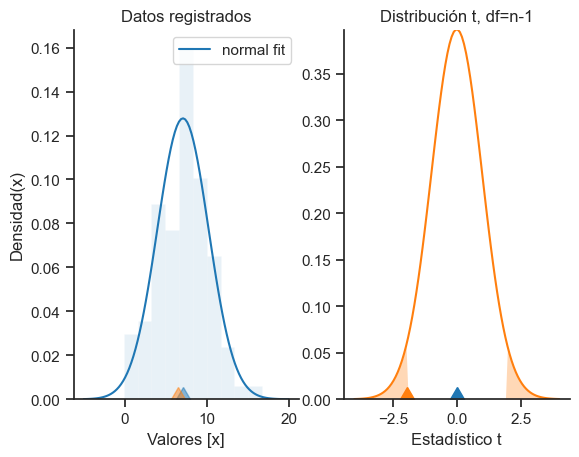

In [28]:
# Preparo el gráfico
sns.set_context('notebook')
sns.set_style('ticks')
fig, axs = plt.subplots(1,2)
#setFonts(14)

# Gráfico izquierdo ------------------------------------
# Trace el histograma de los datos, superpuesto con el ajuste normal
xval = np.linspace(-5,20, 100)
yval = stats.norm(meanVal,stdVal).pdf(xval)

axs[0].hist(data, density=True, color='C0', alpha=0.1)
axs[0].plot(xval, yval, 'C0', label='normal fit')
axs[0].set_title('Datos registrados')
axs[0].legend()

# Marque el valor medio, así como el valor de interés
axs[0].plot(meanVal, 0, marker='d', color='C0', ms=12, alpha=0.5)
axs[0].plot(checkVal, 0, marker='d', color='C1', ms=12, alpha=0.5)
axs[0].set_xlabel('Valores [x]')
axs[0].set_ylabel('Densidad(x)')

sns.despine()

# Gráfico derecho ------------------------------------
# La distribución t correspondiente
xv2 = np.linspace(-4,4, 100)
yv2 = stats.t(len(data)-1).pdf(xv2)


tFill = yv2.copy()
tFill[(xv2>-tstatistic) & (xv2<tstatistic)] = 0

axs[1].plot(xv2, yv2, color='C1')
axs[1].fill_between(xv2, tFill, color='C1', alpha=0.3, lw=0)
axs[1].plot(tVal, 0, marker='d', color='C1', ms=12)
axs[1].plot(0, 0, marker='d', color='C0', ms=12)
axs[1].set_xlabel('Estadístico t')
axs[1].set_title('Distribución t, df=n-1')
axs[1].margins(y=0)
# axs[1].legend(loc='upper right')

sns.despine()

plt.show()

### b) Pingouin

In [30]:
# Generamos los datos
np.random.seed(12345)
data = stats.norm(7,3).rvs(100)

In [31]:
# Test T con pingouin
result = pg.ttest(data, checkVal)
result.round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.925,99,two-sided,0.057,"[6.48, 7.72]",0.193,0.651,0.479


In [32]:
result['T']

T-test    1.925225
Name: T, dtype: float64

In [33]:
result['p-val']

T-test    0.057071
Name: p-val, dtype: float64

T 
- Diferencia entre la media de la muestra y el valor de referencia, normalizada por el SEM 

dof
- len(data)-1 

tail 
- Por defecto se realiza una comparación bilateral, es decir, se comprueba si los datos son diferentes del valor de referencia. 
- Las comparaciones que usan alternative = 'greater' o alternative = 'less' emplean las comparaciones unilaterales correspondientes. 
    
p-val 
- El área bajo la distribución T para valores T más extremos que el valor observado 
    
IC95% 
- Intervalo de confianza del 95% alrededor de la media de la muestra. 
- Dado que en el ejemplo anterior esto incluye el valor de referencia (6.5), el resultado no es significativo. 
    
cohen-d
- Tamaño del efecto.
- Diferencia entre la media de la muestra y el valor de referencia, normalizada por la desviación estándar de la muestra 
    
BF10 ("Factor de Bayes uno-cero") 
- Una alternativa bayesiana a la prueba de hipótesis clásica. 
    
potencia 
- Es el área bajo la curva de la distribución de probabilidad de la media muestral, fuera de los valores críticos (áreas sombreadas en la figura).

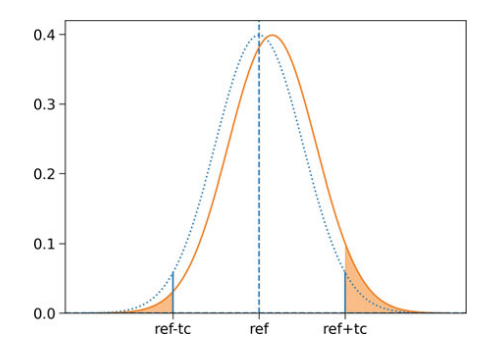

In [4]:
Image(filename = 'Imagenes/7.7.png')

Aquí esta distribución es una distribución T no central relativa al valor de referencia.

Análisis de un grupo de datos 
- Usar una prueba t para una sola media 
- Usar una prueba no paramétrica (suma de rango con signo de Wilcoxon) para verificar una sola media 
- Comparar los valores de la distribución t con los de una distribución normal

In [37]:
# Datos
inFile = 'Datos/altman_91.txt'
data = np.genfromtxt(inFile, delimiter=',')

# Cuidado: por defecto, la desviación estándar en numpy se calcula con ddof=0, correspondiente a 1/N!
myMean = np.mean(data)
mySD = np.std(data, ddof=1)     # desviación estándar de la muestra
print(f'La media es: {myMean}.\n')
print(f'La desviación estándar es: {mySD}.\n')

# Intervalos de confianza
tf = stats.t(len(data)-1)
# multiplicación con np.array[-1,1]  es un buen truco para implementar "+/-"
ci = myMean + stats.sem(data)*np.array([-1,1])*tf.ppf(0.975)
print(f'El intervalo de confianza es: [{ci[0]:4.2f} - {ci[1]:4.2f}].\n')

# Compruebe si hay una diferencia significativa en relación con "checkValue"
checkValue = 7725

t, prob = stats.ttest_1samp(data, checkValue)
if prob < 0.05:
    print(f'{checkValue} es significativamente diferente de la media (p={prob:.3f}).\n')

# Para datos que no se distribuyen normalmente, use la prueba de suma de rango con signo de Wilcoxon
(rank, pVal) = stats.wilcoxon(data-checkValue)
if pVal < 0.05:
    issignificant = 'improbable'
else:
    issignificant = 'probable'

print(f'Es {issignificant} que el valor sea {checkValue}.')

La media es: 6753.636363636364.

La desviación estándar es: 1142.1232221373727.

El intervalo de confianza es: [5986.35 - 7520.93].

7725 es significativamente diferente de la media (p=0.018).

Es improbable que el valor sea 7725.


In [38]:
from pprint import pprint

In [39]:
# Generamos los datos
np.random.seed(12345)
n = 100
data = stats.norm(7,3).rvs(n)

# Parámetros de análisis
c = 6.5
alpha = 0.05

# Parámetros estándar
mean = np.mean(data)
sem = stats.sem(data) # Poblacional
std = np.std(data, ddof=1) # Muestral
dof = n - 1

h1 = stats.t(df = len(data)-1, loc = mean, scale = sem)

# Reproducir los resultados de la prueba T de pingouin
results = {}

results['dof'] = dof
results['t_val'] = (mean-c)/sem
results['d'] = (mean-c)/np.std(data, ddof=1)

tc = stats.t(dof).isf(alpha/2)
results['p_val'] = stats.t(dof).sf(results['t_val'])*2

results['ci'] = h1.ppf([alpha/2, 1-alpha/2])

# Cálculo de potencia
nct = stats.nct(df = dof, nc = (mean-c)/sem)
results['power'] = nct.sf(tc) + nct.cdf(-tc)

pprint(results)

{'ci': array([6.48158937, 7.72009696]),
 'd': 0.19252254884316808,
 'dof': 99,
 'p_val': 0.05707107880872914,
 'power': 0.47875082678530345,
 't_val': 1.9252254884316808}


Diferencia entre la distribución t y la distribución normal

In [40]:
# Generamos los datos
np.random.seed(12345)
normDist = stats.norm(loc=7, scale=3)
data = normDist.rvs(100)
checkVal = 6.5

# Test T
t, tProb = stats.ttest_1samp(data, checkVal)

# Comparación con la distribución normal correspondiente
mmean = np.mean(data)
mstd = np.std(data, ddof=1)
normProb = stats.norm.cdf(checkVal, loc=mmean,
                          scale=mstd/np.sqrt(len(data)))*2

# Comparamos
print(f'La probabilidad de la prueba t es {tProb:.4f}, y de la distribución normal {normProb:.4f}.')

La probabilidad de la prueba t es 0.0571, y de la distribución normal 0.0542.


## 8.1.2 Prueba de la suma de rangos con signo de Wilcoxon

Si los datos no se distribuyen normalmente, no se debe usar la prueba t de una muestra, aunque esta prueba es bastante sólida frente a las desviaciones de la normalidad

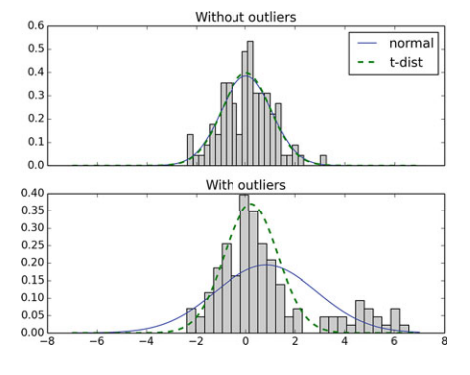

In [41]:
Image(filename = 'Imagenes/6.17.png')

En su lugar, debemos utilizar una prueba no paramétrica sobre el valor medio. 

Podemos hacer esto realizando una prueba de suma de rango con signo de Wilcoxon. 

Tenga en cuenta que, a diferencia de la prueba t de una muestra, esta prueba verifica una diferencia de nulo:

Consta de 3 pasos:

1. Calcular la diferencia entre cada observación y el valor de interés. 

2. Ignorando los signos de las diferencias, ubíquelos en orden de magnitud. 

3. Calcular la suma de los rangos de todos los rangos negativos (o positivos), correspondientes a las observaciones por debajo (o por encima) del valor hipotético elegido.

Ej: se prueba la importancia de una desviación del valor de 7725.

| Sujeto | Ingesta diaria de energía (kJ) | Diferencia de 7725 kJ | Rangos de diferencias |
|---|---|---|---|
| 1 | 5260 | 2465 | 11 |
| 2 | 5470 | 2255 | 10 |
| 3 | 5640 | 2085 | 9 |
| 4 | 6180 | 1545 | 8 |
| 5 | 6390 | 1335 | 7 |
| 6 | 6515 | 1210 | 6 |
| 7 | 6805 | 920 | 4 |
| 8 | 7515 | 210 | 1.5 |
| 9 | 7515 | 210 | 1.5 |
| 10 | 8230 | −505 | 3 |
| 11 | 8770 | −1045 | 5 |

La suma de rangos de los valores negativos da 3 + 5 = 8, y se puede buscar en las tablas correspondientes para que sean significativos. 

Los valores empatados (7515) obtienen su rango medio (1.5).

In [42]:
# Datos
inFile = 'Datos/altman_91.txt'
data = np.genfromtxt(inFile, delimiter=',')

In [43]:
# Compruebe si hay una diferencia significativa en relación con "checkValue"
checkValue = 7725

In [44]:
# Para datos que no se distribuyen normalmente, use la prueba de suma de rango con signo de Wilcoxon
(rank, pVal) = stats.wilcoxon(data-checkValue)
if pVal < 0.05:
    issignificant = 'improbable'
else:
    issignificant = 'probable'

print(f'Es {issignificant} que el valor sea {checkValue}.')

Es improbable que el valor sea 7725.


In [45]:
rank

8.0

In [46]:
pVal

0.0244140625

### a) Pingouin 

Para las pruebas no paramétricas, la "potencia" y el valor "BF10" no están definidos. 

Para tales pruebas, pingouin devuelve los siguientes valores: 

- CLES ("tamaño del efecto del lenguaje común") 
    - Probabilidad de que una puntuación seleccionada al azar de una población sea mayor que una puntuación de una muestra aleatoria de la otra población.
- RBC (“correlación biserial de rango”) 
    - Otra forma de caracterizar el tamaño del efecto para variables continuas que no se distribuyen normalmente. 
    - Relacionado con el CLES.

result = pg.wilcoxon(data, checkValue*np.ones_like(data))

In [47]:
# Prueba de suma de rangos con signo de Wilcoxon
result = pg.wilcoxon(data - checkValue)
result

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,8.0,two-sided,0.024414,-0.757576,NaN


# 8.2 Comparación de 2 grupos

## 8.2.1 Prueba T pareada

Se comparan entre sí 2 valores registrados del mismo sujeto en momentos diferentes. 
- Ej: el tamaño de los estudiantes cuando ingresan a la escuela primaria y después de su primer año, para verificar si han crecido.

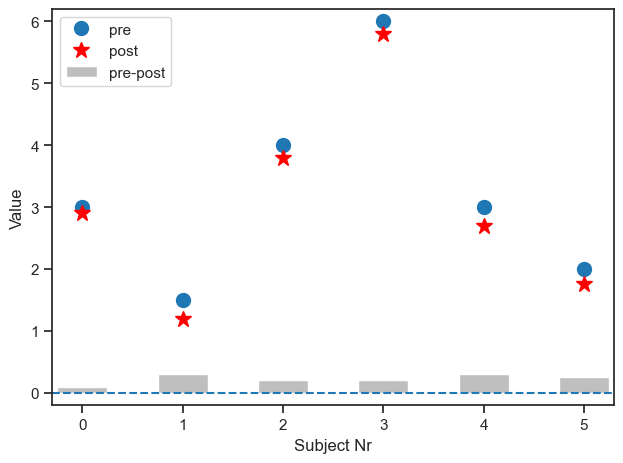

In [48]:
# Generamos los datos 
x = np.r_[3, 1.5, 4, 6, 3, 2]
dx = np.r_[0.1, 0.3, 0.2, 0.2, 0.3, 0.25]
xs = x-dx
index = range(len(x))

# Grafico
#setFonts(20)
plt.plot(x, 'o', ms=10, label='pre')
plt.plot(xs, 'r*', ms=12, label='post')
plt.bar(index, dx, width=0.5, align='center',
        color=0.75*np.ones(3), label='pre-post')


plt.legend(loc='upper left')
plt.axhline(0, ls='--')
plt.xlim(-0.3, 5.3)
plt.ylim(-0.2, 6.2)
plt.xlabel('Subject Nr')
plt.ylabel('Value')
plt.tight_layout()

plt.show()

In [49]:
# Valores P para pruebas T pareadas y no pareadas
_, p_paired = stats.ttest_rel(x, xs)
_, p_ind = stats.ttest_ind(x, xs)

print(f'Una comparación pareada produce p = {p_paired:.4f}, mientras que una prueba T no pareada nos da p = {p_ind:.3f}')

Una comparación pareada produce p = 0.0008, mientras que una prueba T no pareada nos da p = 0.815


Dado que solo estamos interesados en la diferencia en cada sujeto entre la primera y la segunda medición, esta prueba se denomina prueba t pareada y es esencialmente equivalente a una prueba t de una muestra para la diferencia de medias. 

Por lo tanto, las dos pruebas stats.ttest_1samp y stats.ttest_rel proporcionan el mismo resultado (hay una diferencia mínima):

In [50]:
np.random.seed(1234)

diffs = np.random.randn(10) + 0.1
data_1 = np.random.randn(10) * 5 
data_2 = data_1 + diffs # misma diferencia de grupo que 'diffs'

data_2

array([  6.32161379,   3.86875442,   6.29932761, -10.318926  ,
        -2.29097556,   0.99775476,   2.98685547,   0.9089362 ,
         6.72148733,  -9.87721272])

In [52]:
stats.ttest_1samp(diffs, 0)

TtestResult(statistic=-0.12458492298731401, pvalue=0.9035904508547086, df=9)

In [53]:
stats.ttest_rel(data_2, data_1)

TtestResult(statistic=-0.12458492298731347, pvalue=0.9035904508547089, df=9)

## 8.2.2 Prueba T entre grupos independientes

Una prueba t no pareada, o prueba t para 2 grupos independientes, compara 2 grupos. 

Ej: comparación del efecto de 2 medicamentos administrados a 2 grupos diferentes de pacientes. 

La idea básica es la misma que para la prueba t de una muestra. Pero en lugar de la varianza de la media, necesitamos la varianza de la diferencia entre las medias de los 2 grupos. 

Dado que la varianza de una suma (o diferencia) de variables aleatorias independientes es igual a la suma de las varianzas, tenemos

$ sd(\bar{x_1} \pm \bar{x_2}) = \sqrt{var(\bar{x_1}) + var(\bar{x_2})} $

= $ \sqrt{\{sd(\bar{x_1}\}^2 + \{sd(\bar{x_1}\}^2} $

= $ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} $

donde $ \bar{x_i} $ es la media de la i-ésima muestra, y $ sd(\bar{x}) indica aquí el error estándar de la media.

In [54]:
t_statistic, pVal = stats.ttest_ind(data_1, data_2)

In [55]:
t_statistic

0.016280259660677216

In [56]:
pVal

0.9871899046495229

## 8.2.3 Pruebas T con Pingouin

In [60]:
# Test T de una muestra
stats.ttest_1samp(data, checkVal)

TtestResult(statistic=19.593087062591213, pvalue=2.6234726029998787e-09, df=10)

In [61]:
pg.ttest(data, checkVal)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,19.593087,10,two-sided,2.623473e-09,"[5986.35, 7520.93]",5.907538,3.192e+06,1.0


In [62]:
# Test T no pareada
stats.ttest_ind(data_1, data_2)

Ttest_indResult(statistic=0.016280259660677216, pvalue=0.9871899046495229)

In [63]:
pg.ttest(data_1, data_2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.01628,18,two-sided,0.98719,"[-5.59, 5.68]",0.007281,0.397,0.050027


In [64]:
# Test T pareada
stats.ttest_rel(data_1, data_2)

TtestResult(statistic=0.12458492298731347, pvalue=0.9035904508547089, df=9)

In [65]:
pg.ttest(data_1, data_2, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.124585,9,two-sided,0.90359,"[-0.75, 0.84]",0.007281,0.311,0.050049


## 8.2.4 Comparación no paramétrica de 2 grupos: prueba de Mann-Whitney

Si los valores de medición de 2 grupos no se distribuyen normalmente, tenemos que recurrir a una prueba no paramétrica. 

La más común para la comparación de 2 grupos independientes es la prueba de Mann-Whitney (-Wilcoxon). 

Esta prueba también se conoce como prueba de suma de rangos de Wilcoxon. ¡Esto es diferente de la prueba de suma de rangos con signo de Wilcoxon! 

El estadístico de prueba se indica comúnmente con u:

In [66]:
# Con scipy.stats
u_statistic, pVal = stats.mannwhitneyu(data_1, data_2)

In [67]:
u_statistic

49.0

In [68]:
pVal

0.9698499769931556

In [69]:
# Con pingouin
results = pg.mwu(data_1, data_2)
results

,U-val,alternative,p-val,RBC,CLES
MWU,49.0,two-sided,0.96985,0.02,0.49


Comparación de 2 grupos
- Análisis de datos pareados
- Análisis de datos no apareados

Análisis de datos pareados: compare la ingesta diaria media durante 10 días premenstruales y 10 días posmenstruales (en kJ).

In [3]:
# Obtenga los datos: ingesta diaria de energía en kJ para 11 mujeres
inFile = r'Datos/altman_93.txt'
data = np.genfromtxt(inFile, delimiter=',')
data

array([[5260., 3910.],
       [5470., 4220.],
       [5640., 3885.],
       [6180., 5160.],
       [6390., 5645.],
       [6515., 4680.],
       [6805., 5265.],
       [7515., 5975.],
       [7515., 6790.],
       [8230., 6900.],
       [8770., 7335.]])

In [4]:
np.mean(data, axis=0)

array([6753.63636364, 5433.18181818])

In [5]:
np.std(data, axis=0, ddof=1)

array([1142.12322214, 1216.83251257])

In [6]:
pre = data[:,0]
pre

array([5260., 5470., 5640., 6180., 6390., 6515., 6805., 7515., 7515.,
       8230., 8770.])

In [7]:
post = data[:,1]
post

array([3910., 4220., 3885., 5160., 5645., 4680., 5265., 5975., 6790.,
       6900., 7335.])

In [8]:
# Prueba t pareada: hacer 2 mediciones en la misma unidad experimental
# por ejemplo, antes y después de un tratamiento
t_statistic, p_value = st.ttest_1samp(post - pre, 0)
print(f'El estadístico t es: {t_statistic} y el valor-p es: {p_value}.')

El estadístico t es: -11.941392877647603 y el valor-p es: 3.059020942934875e-07.


In [9]:
alpha = 0.05

if p_value < alpha:
    print('La diferencia en la media no es igual a 0.')
else:
    print('La diferencia en la media es igual a 0')

La diferencia en la media no es igual a 0.


In [12]:
# Alternativa a la prueba t pareada cuando los datos tienen una escala ordinaria o cuando no se distribuyen normalmente
rankSum, p_value = st.wilcoxon(post - pre)
print(f"El valor-p para el test de suma de rangos con signo de Wilcoxon es {p_value}.")

El valor-p para el test de suma de rangos con signo de Wilcoxon es 0.0009765625.


In [23]:
rankSum

0.0

Análisis de datos no pareados: gasto energético total de 24 horas (MJ/día), en grupos de mujeres delgadas y obesas.

In [13]:
# Obtener los datos: gasto de energía en mJ y estatura (0=obeso, 1=delgado)
inFile = r'Datos/altman_94.txt'
energ = np.genfromtxt(inFile, delimiter=',')
energ

array([[ 9.21,  0.  ],
       [ 7.53,  1.  ],
       [ 7.48,  1.  ],
       [ 8.08,  1.  ],
       [ 8.09,  1.  ],
       [10.15,  1.  ],
       [ 8.4 ,  1.  ],
       [10.88,  1.  ],
       [ 6.13,  1.  ],
       [ 7.9 ,  1.  ],
       [11.51,  0.  ],
       [12.79,  0.  ],
       [ 7.05,  1.  ],
       [11.85,  0.  ],
       [ 9.97,  0.  ],
       [ 7.48,  1.  ],
       [ 8.79,  0.  ],
       [ 9.69,  0.  ],
       [ 9.68,  0.  ],
       [ 7.58,  1.  ],
       [ 9.19,  0.  ],
       [ 8.11,  1.  ]])

In [14]:
# Agrupalos
group1 = energ[:, 1] == 0
group1 = energ[group1][:, 0]
group2 = energ[:, 1] == 1
group2 = energ[group2][:, 0]

In [15]:
group1

array([ 9.21, 11.51, 12.79, 11.85,  9.97,  8.79,  9.69,  9.68,  9.19])

In [16]:
group2

array([ 7.53,  7.48,  8.08,  8.09, 10.15,  8.4 , 10.88,  6.13,  7.9 ,
        7.05,  7.48,  7.58,  8.11])

In [17]:
np.mean(group1)

10.297777777777776

In [18]:
np.mean(group2)

8.066153846153847

In [19]:
# Test t de 2 muestras
# Hipótesis nula: los dos grupos tienen la misma media
# Esta prueba asume que los dos grupos tienen la misma varianza
# (se puede verificar con pruebas para la misma varianza)
# grupos independientes: por ejemplo, cómo les va a los niños y niñas en un examen
# grupos dependientes: por ejemplo, cómo le va a la misma clase en 2 exámenes diferentes
t_statistic, p_value = st.ttest_ind(group1, group2)
print(f'El estadístico t es: {t_statistic} y el valor-p es: {p_value}.')

El estadístico t es: 3.9455649161549835 y el valor-p es: 0.0007989982111700593.


In [20]:
alpha = 0.05

if p_value < alpha:
    print('No tienen la misma media al 5% de nivel de significancia.')
else:
    print('Tienen la misma media al 5% de nivel de significancia.')

No tienen la misma media al 5% de nivel de significancia.


In [21]:
# Para datos que no se distribuyen normalmente, realice la prueba de Wilcoxon de dos muestras
# alias Mann Whitney U
u, p_value = st.mannwhitneyu(group1, group2, alternative='two-sided')
print(f"El valor-p para el test Mann-Whitney es: {p_value}.")

El valor-p para el test Mann-Whitney es: 0.002121613385880049.


In [22]:
u

105.0

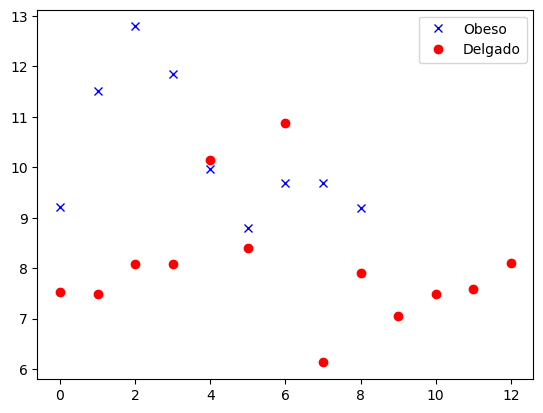

In [25]:
# Grafico
plt.plot(group1, 'bx', label='Obeso')
plt.plot(group2, 'ro', label='Delgado')

plt.legend(loc=0)

plt.show()

In [26]:
# Los mismos cálculos, pero implementados con pandas, serían:
df = pd.DataFrame(energ, columns = ['energy', 'weightClass'])
df

,energy,weightClass
0,9.21,0.0
1,7.53,1.0
2,7.48,1.0
3,8.08,1.0
4,8.09,1.0
5,10.15,1.0
6,8.40,1.0
7,10.88,1.0
8,6.13,1.0
9,7.90,1.0


In [27]:
grouped = df.groupby('weightClass')
grouped

In [28]:
grouped.mean()

,energy
weightClass,
0.0,10.297778
1.0,8.066154


In [29]:
t_statistic, p_value = stats.ttest_ind(grouped.get_group(0).energy,
                                       grouped.get_group(1).energy)
print(f'El estadístico t es: {t_statistic} y su valor-p es: {p_value}.')

El estadístico t es: 3.9455649161549835 y su valor-p es: 0.0007989982111700593.


In [30]:
alpha = 0.05

if p_value < alpha:
    print('No tienen la misma media al 5% de nivel de significancia.')
else:
    print('Tienen la misma media al 5% de nivel de significancia.')

No tienen la misma media al 5% de nivel de significancia.


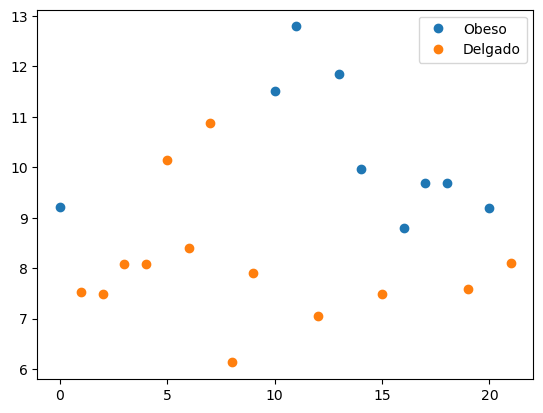

In [32]:
grouped.energy.plot(marker='o', lw=0)

plt.legend(['Obeso', 'Delgado'])

plt.show()

Los problemas se pueden ver desde 2 perspectivas: 
- Uno puede hacer una hipótesis estadística y verificar o falsear esa hipótesis
- Uno puede hacer un modelo estadístico y analizar la importancia de los parámetros del modelo. 

Equivalencia entre T-Test y Modelo Estadístico.

In [34]:
# Generar datos normalmente distribuidos alrededor de 'reference' + 0.2
np.random.seed(123)
reference = 5
diffs = 0.2 + np.random.randn(100)

random.seed(123) inicializa el generador de números aleatorios con el número 123, lo que garantiza que 2 ejecuciones consecutivas de este código produzcan el mismo resultado. 

In [35]:
values = reference + diffs
values

array([4.1143694 , 6.19734545, 5.4829785 , 3.69370529, 4.62139975,
       6.85143654, 2.77332076, 4.77108737, 6.46593626, 4.3332596 ,
       4.52111385, 5.10529103, 6.69138963, 4.561098  , 4.75601804,
       4.76564872, 7.40593008, 7.38678609, 6.2040539 , 5.5861864 ,
       5.93736858, 6.69073203, 4.26416613, 6.37582904, 3.94611933,
       4.5622485 , 6.1071052 , 3.7713193 , 5.05993128, 4.3382451 ,
       4.94438063, 2.40141089, 3.4284669 , 4.50012277, 6.12746243,
       5.02636432, 5.20284592, 5.88822271, 4.32046366, 5.48362732,
       4.39463348, 3.47233051, 4.80910021, 5.77380586, 5.53858905,
       5.18816951, 7.59236527, 5.61291216, 6.17873601, 7.43814334,
       3.90591468, 4.16121179, 6.94371223, 4.40193726, 5.22968323,
       6.26931597, 6.09070639, 6.95488618, 6.69564414, 6.26939267,
       4.42729129, 5.99486267, 5.51427199, 3.87373454, 6.61729905,
       6.00723653, 5.24549008, 4.96690794, 4.00169886, 5.39952407,
       5.66843912, 4.36884502, 6.36220405, 4.10279695, 3.07689

In [36]:
diffs_df = pd.DataFrame({'diffs': diffs})  
diffs_df

,diffs
0,-0.885631
1,1.197345
2,0.482978
3,-1.306295
4,-0.378600
...,...
95,1.231114
96,-0.884568
97,-1.163472
98,0.579401


In [38]:
# Test t
(t, pVal) = st.ttest_1samp(values, reference) 
print(f'La probabilidad de que la media muestral sea diferente de {reference} es {pVal:.3f}.')

La probabilidad de que la media muestral sea diferente de 5 es 0.048.


In [42]:
t

2.002859150054274

In [41]:
alpha = 0.05

if pVal < alpha:
    print('La media de la muestra es significativamente diferente de la referencia.')
else:
    print('La media de la muestra no es significativamente diferente de la referencia.')

La media de la muestra es significativamente diferente de la referencia.


In [39]:
# Modelo lineal equivalente
result = smf.ols('diffs ~ 1', data=diffs_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  diffs   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Jul 2023   Prob (F-statistic):                nan
Time:                        12:30:52   Log-Likelihood:                -153.96
No. Observations:                 100   AIC:                             309.9
Df Residuals:                      99   BIC:                             312.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2271      0.113      2.003      0.0

In [40]:
diffs_df.mean() # Da el mismo valor que el intercepto 

diffs    0.227109
dtype: float64

Expresado como un modelo estadístico, asumimos que la diferencia entre los datos de la muestra y la referencia es simplemente un valor constante. 

La hipótesis nula sería que este valor es igual a cero. 

Este modelo tiene un parámetro, un valor constante, y esto se expresa en la fórmula 'diffs ~ 1'. 

MCO prueba el modelo que describe las diferencias con solo un desplazamiento, que en el lenguaje de modelado también se denomina "intersección". 

La probabilidad de que esta intersección sea cero es 0.048, que es equivalente al resultado de la prueba t.

El valor t y p para el intercepto obtenido con el modelo estadístico son los mismos que con la prueba t clásica

# 8.3 Comparación de múltiples grupos

## 8.3.1 Análisis de Varianza (ANOVA)

La idea es dividir la varianza en la varianza entre grupos y dentro de los grupos, y ver si esas distribuciones coinciden con la hipótesis nula de que todos los grupos provienen de la misma distribución. 

Las variables que distinguen a los diferentes grupos se denominan factores o tratamientos. 

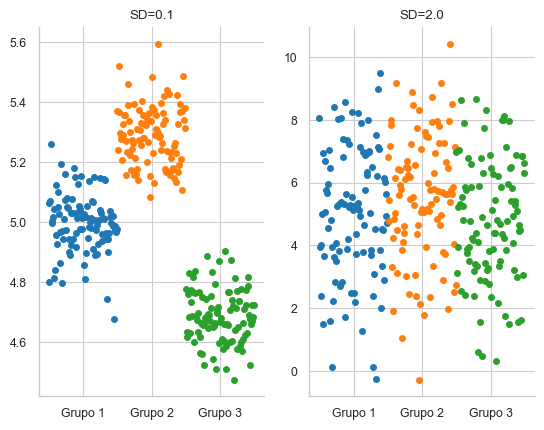

In [47]:
def show_fig(std, ax, title):
    """Crear una gráfica de datos normalmente distribuidos en un eje dado"""

    for ii in range(3):
        data = stats.norm(centers[ii], std).rvs(numData)
        offset = ii*numData
        ax.plot( offset+np.arange(numData), data, '.', ms=8)

    ax.xaxis.set_ticks([50,150,250])
    ax.set_xticklabels(['Grupo 1', 'Grupo 2', 'Grupo 3'])
    ax.set_title(title)
    sns.despine()


if __name__ == '__main__':

    # Configurar la figura
    sns.set_context('paper')
    sns.set_style('whitegrid')
    #setFonts(14)

    # Cree 2 gráficos de 3 grupos de datos diferentes, distribuidos normalmente, con SD diferentes
    fig, axs = plt.subplots(1, 2)
    centers = [5, 5.3, 4.7]
    stds = [0.1, 2]
    numData = 100
    show_fig(0.1, axs[0], 'SD=0.1')
    show_fig(2,   axs[1], 'SD=2.0')
    plt.show()

Las pruebas t analizan los valores medios de 2 grupos y verifican si son consistentes con la suposición de que los dos grupos provienen de la misma distribución. 

Si comparamos 3 grupos (un grupo sin tratamiento, otro con el tratamiento A y un tercero con el tratamiento B), luego realizamos un ANOVA de un factor (ANOVA de una vía) con el tratamiento como factor de análisis único. 

Si hacemos la misma prueba con hombres y mujeres, entonces tenemos un ANOVA de 2 factores o de 2 vías, con el género y el tratamiento como los 2 factores de tratamiento. 

Con los ANOVA es muy importante tener exactamente el mismo número de muestras en cada grupo de análisis. (ANOVA balanceado: un diseño balanceado tiene el mismo número de observaciones para todas las combinaciones posibles de niveles de factores). 

Debido a que la hipótesis nula es que no hay diferencia entre los grupos, la prueba se basa en una comparación de la variación observada entre los grupos (eentre sus medias) con la esperada de la variabilidad observada entre sujetos. La comparación toma la forma general de una prueba F para comparar varianzas, pero para 2 grupos la prueba t conduce exactamente al mismo resultado.

ANOVA de una vía: Supone que todas las muestras se extraen de poblaciones normalmente distribuidas, que estas poblaciones tienen la misma varianza y que las muestras son independientes entre sí. 

La suposición de igualdad de varianza se puede verificar con la prueba de Levene. 

ANOVA utiliza terminología tradicional. 
- DF: Grados de libertad
- SS: Suma de cuadrados
    - Suma
- MS: Cuadrado medio
    - Relación entre los 2
- Desviaciones de la media muestral
    - Términos cuadrados
    
La varianza de la muestra se define por

$ s^2 = \frac{1}{DF} \sum (y_i - \bar{y})^2 = \frac{SS}{DF} $.

Técnica fundamental: es una partición de la suma total de cuadrados SS en componentes relacionados con los efectos utilizados en el modelo.

C:\Users\usuario\AppData\Local\Temp\ipykernel_3392\3546600920.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate('', xy=(210, grandMean), xytext=(210,groupMean[1]),
C:\Users\usuario\AppData\Local\Temp\ipykernel_3392\3546600920.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate('', xy=(90, groupMean[1]), xytext=(90,groupMean[1]+0.2),


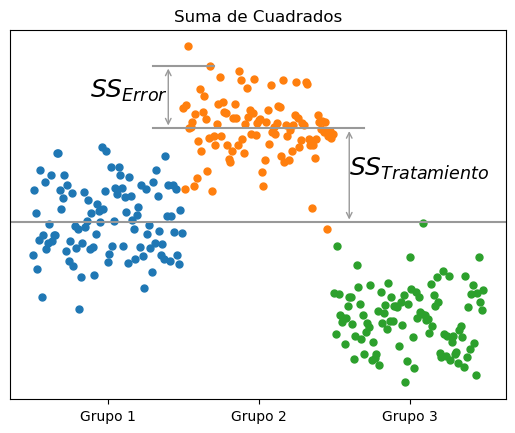

In [2]:
def show_fig(std, ax, title):
    """Cree un gráfico de 3 grupos de datos diferentes, 
    normalmente distribuidos"""

    groupMean = []
    for i in range(3):
        data = stats.norm(centers[i], std).rvs(numData)
        offset = i*numData
        ax.plot(offset+np.arange(numData), data, '.', ms=10)
        groupMean.append(np.mean(data))

    ax.xaxis.set_ticks([50,150,250])
    ax.set_xticklabels(['Grupo 1', 'Grupo 2', 'Grupo 3'])
    ax.yaxis.set_ticks([])
    ax.set_title(title)

    grandMean = np.mean(groupMean)
    gray = '#999999'
    arrowprops = dict(arrowstyle = '<->', facecolor='black', color=gray)

    ax.axhline(grandMean, color=gray)
    ax.plot([80, 220], [groupMean[1], groupMean[1]], color=gray)
    ax.plot([80, 120], [groupMean[1]+0.2, groupMean[1]+0.2], color=gray)
    ax.annotate('', xy=(210, grandMean), xytext=(210,groupMean[1]),
            arrowprops=arrowprops )
    ax.annotate('', xy=(90, groupMean[1]), xytext=(90,groupMean[1]+0.2),
            arrowprops=arrowprops )
    ax.text(210, (grandMean + groupMean[1])/2., '$SS_{Tratamiento}$', fontsize=18)
    ax.text(90, groupMean[1]+0.1, '$SS_{Error}$', ha='right', fontsize=18)


if __name__ == '__main__':
    centers = [5, 5.3, 4.7]

    np.random.seed(123)
    #setFonts(18)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    std = 0.1
    numData = 100
    show_fig(0.1, ax, 'Suma de Cuadrados')

    plt.show()

ANOVA estima 3 varianzas de muestra:
- Una varianza total basada en todas las desviaciones de observación de la gran media (calculada a partir de $SS_{Total}$)
- Una varianza de tratamiento ($SS_{Tratamiento}$)
- Una varianza de error basada en todas las desviaciones de observación de su medios de tratamiento apropiados (de $SS_{Error}$) 

La varianza del tratamiento se basa en las desviaciones de las medias de los tratamientos con respecto a la gran media, y el resultado se multiplica por el número de observaciones en cada tratamiento para tener en cuenta la diferencia entre la varianza de las observaciones y la varianza de las medias. 

Las tres sumas de cuadrados están relacionadas por

$ SS_{Total} = SS_{Error} + SS_{Tratamiento} $

donde
- $SS_{Total}$: es la desviación de la suma cuadrática de la media general
- $SS_{Error}$: es la desviación de la suma cuadrática de la media dentro de un grupo
- $SS_{Tratamiento}$: es la desviación de la suma cuadrática entre cada grupo y la media general 

Si la hipótesis nula es verdadera, las tres estimaciones de varianza son iguales (dentro del error de muestreo). 

El número de grados de libertad se puede dividir: uno de estos componentes (el del error) especifica una distribución de chi-cuadrado que describe la suma de cuadrados asociada, mientras que lo mismo es cierto para los tratamientos si no hay tratamiento efecto.

$ DF_{Total} = DF_{Error} + DF_{Tratamiento} $

### a) Ejemplo: ANOVA de una vía

ANOVA de una vía: prueba si los resultados de 3 grupos son iguales.

Tome los niveles de folato en los glóbulos rojos (µg/l) en 3 grupos de pacientes de bypass cardíaco que recibieron diferentes niveles de ventilación con óxido nitroso. 

22 pacientes fueron incluidos en el análisis.

Los pacientes se sometieron a una cirugía de derivación cardíaca se asignaron al azar a uno de 3 grupos de ventilación:

Grupo I: Los pacientes recibieron una mezcla de óxido nitroso al 50% y oxígeno al 50% de forma continua durante 24 h.

Grupo II: Los pacientes recibieron una mezcla de 50% de óxido nitroso y 50% de oxígeno solo durante la operación.

Grupo III: Los pacientes no recibieron óxido nitroso pero recibieron 35-50% de oxígeno durante 24 h.

Los datos muestran los niveles de folato en glóbulos rojos para los tres grupos después de 24 horas de ventilación.

Hipótesis nula de los ANOVA: todos los grupos provienen de la misma población. 

In [3]:
# Datos
inFile = r'Datos/altman_910.txt'
data = np.genfromtxt(inFile, delimiter=',')
data

array([[243.,   1.],
       [251.,   1.],
       [275.,   1.],
       [291.,   1.],
       [347.,   1.],
       [354.,   1.],
       [380.,   1.],
       [392.,   1.],
       [206.,   2.],
       [210.,   2.],
       [226.,   2.],
       [249.,   2.],
       [255.,   2.],
       [273.,   2.],
       [285.,   2.],
       [295.,   2.],
       [309.,   2.],
       [241.,   3.],
       [258.,   3.],
       [270.,   3.],
       [293.,   3.],
       [328.,   3.]])

In [4]:
# Ordenarlos en grupos, según la columna 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

In [5]:
df = pd.DataFrame(data, columns=['value', 'treatment'])
df.head()

,value,treatment
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0


In [6]:
df.dtypes

value        float64
treatment    float64
dtype: object

In [7]:
# Cambio a variable categórica
df['treatment'] = pd.Categorical(np.int8(df.treatment))

In [8]:
df.dtypes

value         float64
treatment    category
dtype: object

In [9]:
# Primero, verificamos si las varianzas son iguales, con la prueba "Levene"
(W,p) = stats.levene(group1, group2, group3)

In [10]:
W

3.641303086027156

In [11]:
p # < 0.05

0.045846812634186246

In [12]:
alpha = 0.05

if p < alpha:
    print('Al menos una de las varianzas es significativamente diferente de las demás.')
else:
    print('Las varianzas son iguales en todos los grupos.')

Al menos una de las varianzas es significativamente diferente de las demás.


In [13]:
# ANOVA de una vía con scipy.stats
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

In [14]:
F_statistic

3.7113359882669763

In [15]:
pVal

0.043589334959178244

In [16]:
if pVal < 0.05:
    print('Uno de los grupos es significativamente diferente.')
else:
    print('Ninguno de los grupos es significativamente diferente.')    

Uno de los grupos es significativamente diferente.


In [17]:
# Con pingouin 
pg_results = pg.anova(data=df, dv='value', between='treatment')
pg_results.round(4)

,Source,ddof1,ddof2,F,p-unc,np2
0,treatment,2,19,3.7113,0.0436,0.2809


In [18]:
# ... and with statsmodels
model = smf.ols('value ~ C(treatment)', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3.711
Date:                Fri, 28 Jul 2023   Prob (F-statistic):             0.0436
Time:                        10:27:15   Log-Likelihood:                -113.70
No. Observations:                  22   AIC:                             233.4
Df Residuals:                      19   BIC:                             236.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           316.6250     16.16

In [19]:
from statsmodels.stats.anova import anova_lm

In [20]:
sm_results = anova_lm(model)
sm_results.round(4)

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),2.0,15515.7664,7757.8832,3.7113,0.0436
Residual,19.0,39716.0972,2090.3209,NaN,NaN


La salida de statsmodel se puede interpretar de la siguiente manera: 
- Primero se calculan las “Sumas de cuadrados (SS)”. 
    - El SS entre tratamientos es 15515.88
    - El SS de los residuos es 39716.09. 
    - El SS total es la suma de estos 2 valores. 
- Los cuadrados medios (MS) son los SS divididos por los grados de libertad (DF) correspondientes. 
- La prueba F o prueba de relación de varianza se utiliza para comparar los factores de la desviación total. 
    - El valor F es el valor de los cuadrados medios más grande dividido por el valor más pequeño. 
    - Si solo tenemos 2 grupos, el valor F es el cuadrado del valor t correspondiente. 

$ F = \frac{\textit{variación_entre_tratamientos}}{\textit{variación_dentro_tratamientos}} $

$ F = \frac{MS_{Tratamientos}}{MS_{Error}} = \frac{\frac{SS_{Tratamientos}}{(n_{Grupos})-1}}{\frac{SS_{Error}}{(n_{Total}-n_{Grupos})}}$

- Bajo la hipótesis nula de que 2 poblaciones normalmente distribuidas tienen varianzas iguales, esperamos que la razón de las 2 varianzas muestrales tenga una Distribución F. 
    - A partir del valor F, podemos ver el correspondiente valor-p.

In [21]:
# Comprobar si los dos resultados son iguales. Si lo son, no hay salida.
np.testing.assert_almost_equal(F_statistic, sm_results['F'][0])

Calcular el ANOVA a mano.

In [22]:
# Datos
inFile = r'Datos/altman_910.txt'
data = np.genfromtxt(inFile, delimiter=',')
data

array([[243.,   1.],
       [251.,   1.],
       [275.,   1.],
       [291.,   1.],
       [347.,   1.],
       [354.,   1.],
       [380.,   1.],
       [392.,   1.],
       [206.,   2.],
       [210.,   2.],
       [226.,   2.],
       [249.,   2.],
       [255.,   2.],
       [273.,   2.],
       [285.,   2.],
       [295.,   2.],
       [309.,   2.],
       [241.,   3.],
       [258.,   3.],
       [270.,   3.],
       [293.,   3.],
       [328.,   3.]])

In [23]:
df = pd.DataFrame(data, columns=['values', 'group'])
df.head()

,values,group
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0


In [24]:
groups = df.groupby('group')
groups

In [25]:
# La "suma cuadrática total" es la desviación al cuadrado de la media
ss_total = np.sum((df['values']-df['values'].mean())**2)
ss_total

55231.86363636364

In [26]:
# Calcular ss_tratamiento y ss_error
(ss_treatments, ss_error) = (0, 0)
for val, group in groups:
    ss_error += sum((group['values'] - group['values'].mean())**2)
    ss_treatments += len(group) * (group['values'].mean() - df['values'].mean())**2

df_groups = len(groups)-1
df_residuals = len(data)-len(groups)
F = (ss_treatments/df_groups) / (ss_error/df_residuals)
df = stats.f(df_groups,df_residuals)
p = df.sf(F)

In [28]:
print(f'ANOVA-Resultados: F = {F:5.3f}, p < {p:.3f}')

ANOVA-Resultados: F = 3.711, p < 0.044


Equivalencia de la prueba t y la prueba F, para comparar 2 grupos.

In [29]:
# Datos
data = pd.read_csv(r'Datos/galton.csv')
data

,family,father,mother,sex,height,nkids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


In [30]:
# Calculo los valores F y T, ...
F_statistic, pVal = stats.f_oneway(data['father'], data['mother'])

In [31]:
F_statistic

2083.4808060362743

In [32]:
pVal

1.4431979631307123e-302

In [33]:
t_val, pVal_t = stats.ttest_ind(data['father'], data['mother'])

In [34]:
t_val

45.64516191269643

In [35]:
pVal_t

1.443197963131157e-302

In [36]:
print(f'De la prueba t obtenemos t^2 = {t_val:2.3f}, y de la prueba F F = {F_statistic:4.3f}.')

De la prueba t obtenemos t^2 = 45.645, y de la prueba F F = 2083.481.


In [37]:
# prueba numérica
np.testing.assert_almost_equal(t_val**2, F_statistic)

## 8.3.2 Comparaciones múltiples

La hipótesis nula en un ANOVA de una vía es que las medias de todas las muestras son las mismas. 

Si un ANOVA de una vía arroja un resultado significativo, solo sabemos que no son lo mismo. 

A menudo no solo nos interesa la hipótesis conjunta si todas las muestras son iguales, sino que también nos gustaría saber para qué pares de muestras se rechaza la hipótesis de valores iguales. 

En este caso, realizamos varias pruebas al mismo tiempo, una prueba para cada par de muestras. 
- Por lo general, esto se hace con pruebas t. 

Estas pruebas a veces se denominan análisis post-hoc (“después de esto”). 

En el diseño y análisis de experimentos, un análisis post-hoc consiste en buscar en los datos (después de que el experimento haya concluido) patrones que no se especificaron de antemano. 

Este es el caso, porque la hipótesis nula del ANOVA es que no hay diferencia entre los grupos. 

Esto resulta en un problema de prueba múltiple: dado que realizamos pruebas de comparación múltiple, debemos compensar el riesgo de obtener un resultado significativo, incluso si nuestra hipótesis nula es cierta. Esto se puede hacer corrigiendo los valores de p para tener en cuenta esto. 

Tenemos varias opciones para hacerlo: 
- Prueba Tukey HSD 
- Corrección de Bonferroni 
- Corrección de Holms 
- Otras

### a) Test de Tukey

También denominada método de prueba de diferencia significativa honesta (HSD) de Tukey.

Controla la tasa de error de tipo I en múltiples comparaciones.

Se considera una técnica aceptable. 

Se basa en el rango estudentizado (q). 

Este se calcula a partir de una lista de números $x_1, ..., x_n$

$ q_n = \frac{max\{x_1, ..., x_n\} - min\{x_1, ..., x_n\}}{s} $

s es la desviación estándar de la muestra. 

La muestra es una muestra de medias y q es el estadístico de prueba básico. 

Puede usarse como análisis post hoc para probar entre qué dos grupos significa que hay una diferencia significativa (comparaciones por pares) después de rechazar la hipótesis nula de que todos los grupos son de la misma población (todas las medias son iguales).

In [38]:
# El primer y último campo son números enteros de 32 bits; el segundo campo es una cadena de 8 bytes. 
# ¡Tenga en cuenta que aquí también podemos dar nombres a los campos individuales!

data = np.rec.array([
                     (1, 'mental', 2),
                     (2, 'mental', 2),
                     (3, 'mental', 3 ),
                     (4, 'mental', 4 ),
                     (5, 'mental', 4 ),
                     (6, 'mental', 5 ),
                     (7, 'mental', 3 ),
                     (8, 'mental', 4 ),
                     (9, 'mental', 4 ),
                     (10, 'mental', 4 ),
                     (11, 'physical', 4 ),
                     (12, 'physical', 4 ),
                     (13, 'physical', 3 ),
                     (14, 'physical', 5 ),
                     (15, 'physical', 4 ),
                     (16, 'physical', 1 ),
                     (17, 'physical', 1 ),
                     (18, 'physical', 2 ),
                     (19, 'physical', 3 ),
                     (20, 'physical', 3 ),
                     (21, 'medical', 1 ),
                     (22, 'medical', 2 ),
                     (23, 'medical', 2 ),
                     (24, 'medical', 2 ),
                     (25, 'medical', 3 ),
                     (26, 'medical', 2 ),
                     (27, 'medical', 3 ),
                     (28, 'medical', 1 ),
                     (29, 'medical', 3 ),
                     (30, 'medical', 1 )], dtype=[('idx', '<i4'),
                                    ('Treatment', '|S8'),
                                    ('StressReduction', '<i4')])

In [43]:
df = pd.DataFrame(data)
df.head()

,idx,Treatment,StressReduction
0,1,b'mental',2
1,2,b'mental',2
2,3,b'mental',3
3,4,b'mental',4
4,5,b'mental',4


ANOVA de una vía

In [45]:
model = smf.ols('StressReduction ~ C(Treatment)',df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        StressReduction   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     5.164
Date:                Fri, 28 Jul 2023   Prob (F-statistic):             0.0126
Time:                        11:20:19   Log-Likelihood:                -42.816
No. Observations:                  30   AIC:                             91.63
Df Residuals:                      27   BIC:                             95.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [47]:
anovaResults =  anova_lm(model)
anovaResults

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatment),2.0,11.666667,5.833333,5.163934,0.012617
Residual,27.0,30.500000,1.129630,NaN,NaN


In [48]:
if anovaResults['PR(>F)'][0] < 0.05:
    print('Uno de los grupos es diferente.')
else: 
    print('Ninguno de los grupos es diferente.')

Uno de los grupos es diferente.


Test de Tukey

In [50]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

In [52]:
multiComp = MultiComparison(data['StressReduction'], data['Treatment'])
print((multiComp.tukeyhsd().summary()))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
b'medical'   b'mental'      1.5 0.0106  0.3215 2.6785   True
b'medical' b'physical'      1.0 0.1079 -0.1785 2.1785  False
 b'mental' b'physical'     -0.5 0.5514 -1.6785 0.6785  False
------------------------------------------------------------


In [53]:
# Calculo los valores-p:
res2 = pairwise_tukeyhsd(data['StressReduction'], data['Treatment'])
numData = len(df)
numTreatments = len(df.Treatment.unique())
dof = numData - numTreatments

In [54]:
# Mostrar los nombres de los grupos
print(multiComp.groupsunique)

[b'medical' b'mental' b'physical']


In [55]:
# Datos
xvals = np.arange(3)
res2 = pairwise_tukeyhsd(data['StressReduction'], data['Treatment'])
errors = np.ravel(np.diff(res2.confint)/2)

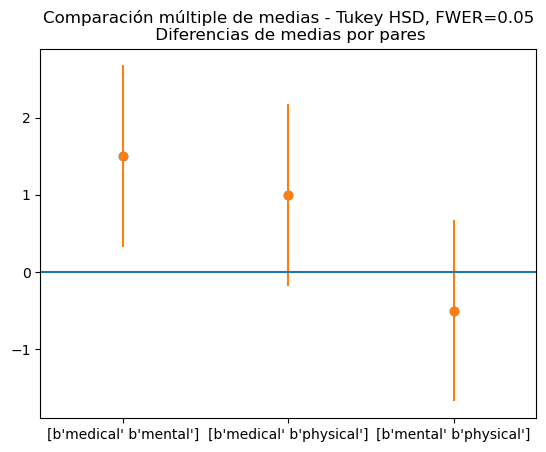

In [56]:
# Gráfico
plt.plot(xvals, res2.meandiffs, 'o')
plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt='o')

# Etiquetas
pair_labels = multiComp.groupsunique[np.column_stack(res2._multicomp.pairindices)]
plt.xticks(xvals, pair_labels)

xlim = -0.5, 2.5
plt.hlines(0, *xlim)
plt.xlim(*xlim)
plt.title('Comparación múltiple de medias - Tukey HSD, FWER=0.05\n Diferencias de medias por pares')

plt.show()

### b) Corrección de Bonferroni

La prueba de rango estudentizado de Tukey (HSD) es una prueba específica para la comparación de todos los pares de $k$ muestras independientes.

Podemos ejecutar pruebas t en todos los pares, calcular los valores p y aplicar una de las correcciones del valor p para múltiples problemas de prueba. 

El enfoque más simple es dividir el valor p requerido por el número de pruebas que hacemos (corrección de Bonferroni). 

Ej: si realiza 4 comparaciones, verifica la significación no en p = 0.05, sino en p = 0.05/4 = 0.0125. 

In [65]:
from statsmodels.stats.multitest import multipletests
multipletests([.05, 0.3, 0.01], method='bonferroni')

(array([False, False,  True]),
 array([0.15, 0.9 , 0.03]),
 0.016952427508441503,
 0.016666666666666666)

### c) Ajuste de Holm

También denominado método de Holm-Bonferroni.

Compara secuencialmente el valor p más bajo con una tasa de error de tipo I que se reduce para cada prueba consecutiva. 

Ej: Si tiene 3 grupos (y, por lo tanto, tres comparaciones), esto significa que el primer valor p se prueba en el nivel 0.05/3 = 0,017, el segundo en el nivel 0.05/2 = 0.025 y el tercero en el nivel 0.05/1 = 0.05. 

Holm (1979) “Excepto en casos triviales sin interés, la prueba de Bonferroni secuencialmente rechazante [es decir, el método de Holm-Bonferroni] tiene una probabilidad estrictamente mayor de rechazar hipótesis falsas, por lo que debería reemplazar la prueba clásica de Bonferroni en todos los instantes en los que esta última suele aplicarse.”

In [60]:
# Primero, con la corrección "Holm"
rtp = multiComp.allpairtest(stats.ttest_rel, method='Holm')
rtp

(<class 'statsmodels.iolib.table.SimpleTable'>,
 (array([[-4.02492236e+00,  2.99577745e-03],
         [-1.93649167e+00,  8.47852128e-02],
         [ 8.32050294e-01,  4.26905707e-01]]),
  array([ True, False, False]),
  array([0.00898733, 0.16957043, 0.42690571]),
  0.016952427508441503,
  0.016666666666666666),
 array([(b'medical', b'mental', -4.0249, 0.003 , 0.009 ,  True),
        (b'medical', b'physical', -1.9365, 0.0848, 0.1696, False),
        (b'mental', b'physical',  0.8321, 0.4269, 0.4269, False)],
       dtype=[('group1', 'O'), ('group2', 'O'), ('stat', '<f8'), ('pval', '<f8'), ('pval_corr', '<f8'), ('reject', '?')]))

In [61]:
print(rtp[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
  group1      group2     stat   pval  pval_corr reject
------------------------------------------------------
b'medical'   b'mental' -4.0249  0.003     0.009   True
b'medical' b'physical' -1.9365 0.0848    0.1696  False
 b'mental' b'physical'  0.8321 0.4269    0.4269  False
------------------------------------------------------


In [62]:
# y luego con la corrección de Bonferroni
multiComp.allpairtest(stats.ttest_rel, method='b')

(<class 'statsmodels.iolib.table.SimpleTable'>,
 (array([[-4.02492236e+00,  2.99577745e-03],
         [-1.93649167e+00,  8.47852128e-02],
         [ 8.32050294e-01,  4.26905707e-01]]),
  array([ True, False, False]),
  array([0.00898733, 0.25435564, 1.        ]),
  0.016952427508441503,
  0.016666666666666666),
 array([(b'medical', b'mental', -4.0249, 0.003 , 0.009 ,  True),
        (b'medical', b'physical', -1.9365, 0.0848, 0.2544, False),
        (b'mental', b'physical',  0.8321, 0.4269, 1.    , False)],
       dtype=[('group1', 'O'), ('group2', 'O'), ('stat', '<f8'), ('pval', '<f8'), ('pval_corr', '<f8'), ('reject', '?')]))

In [63]:
print((multiComp.allpairtest(stats.ttest_rel, method='b')[0]))

Test Multiple Comparison ttest_rel 
FWER=0.05 method=b
alphacSidak=0.02, alphacBonf=0.017
  group1      group2     stat   pval  pval_corr reject
------------------------------------------------------
b'medical'   b'mental' -4.0249  0.003     0.009   True
b'medical' b'physical' -1.9365 0.0848    0.2544  False
 b'mental' b'physical'  0.8321 0.4269       1.0  False
------------------------------------------------------


In [64]:
# Chequeo el programa para probar su correcta ejecución
checkVal = rtp[1][0][0,0]
checkVal

-4.024922359499621

## 8.3.3 Test de Kruskal–Wallis 

Cuando comparamos 2 grupos entre sí, usamos la prueba t cuando los datos se distribuyen normalmente, y la prueba no paramétrica de Mann-Whitney en caso contrario. 

Para 3 o más grupos, el análisis comienza con la verificación de la normalidad y la prueba de Levene, que verifica si las variables son comparables.

Si ese es el caso, se puede proceder con la prueba ANOVA; si no es el caso, entonces se debe utilizar la prueba de Kruskal-Wallis. 

In [66]:
from scipy.stats.mstats import kruskalwallis

Comparación de los niveles de smog en cuatro ciudades diferentes.

In [67]:
# Datos
city1 = np.array([68, 93, 123, 83, 108, 122])
city2 = np.array([119, 116, 101, 103, 113, 84])
city3 = np.array([70, 68, 54, 73, 81, 68])
city4 = np.array([61, 54, 59, 67, 59, 70])

In [68]:
# Realizar la prueba de Kruskal-Wallis
h, p = kruskalwallis(city1, city2, city3, city4)

In [69]:
h

16.028783253379856

In [70]:
p

0.0011186794961869423

In [71]:
if p < 0.05:
    print('Hay una diferencia significativa entre las ciudades.')
else:
    print('No hay diferencia significativa entre las ciudades.')

Hay una diferencia significativa entre las ciudades.


## 8.3.4 ANOVA de dos vías

En comparación con los ANOVA de una vía, el análisis con ANOVA de 2 vías tiene un elemento nuevo. 

Podemos mirar no solo si cada uno de los factores es significativo; también podemos comprobar si la interacción de los factores tiene una influencia significativa en la distribución de los datos. 

Ej: La medición de la circunferencia de la cabeza fetal, por 4 observadores en 3 fetos, de un estudio que investiga la reproducibilidad de los datos ultrasónicos de la circunferencia de la cabeza fetal.

In [72]:
# Datos
inFile = r'Datos/altman_12_6.txt'
data = np.genfromtxt(inFile, delimiter=',')
data

array([[14.3,  1. ,  1. ],
       [14. ,  1. ,  1. ],
       [14.8,  1. ,  1. ],
       [13.6,  1. ,  2. ],
       [13.6,  1. ,  2. ],
       [13.8,  1. ,  2. ],
       [13.9,  1. ,  3. ],
       [13.7,  1. ,  3. ],
       [13.8,  1. ,  3. ],
       [13.8,  1. ,  4. ],
       [14.7,  1. ,  4. ],
       [13.9,  1. ,  4. ],
       [19.7,  2. ,  1. ],
       [19.9,  2. ,  1. ],
       [19.8,  2. ,  1. ],
       [19.8,  2. ,  2. ],
       [19.3,  2. ,  2. ],
       [19.8,  2. ,  2. ],
       [19.5,  2. ,  3. ],
       [19.8,  2. ,  3. ],
       [19.5,  2. ,  3. ],
       [19.8,  2. ,  4. ],
       [19.6,  2. ,  4. ],
       [19.8,  2. ,  4. ],
       [13. ,  3. ,  1. ],
       [12.6,  3. ,  1. ],
       [12.9,  3. ,  1. ],
       [12.4,  3. ,  2. ],
       [12.8,  3. ,  2. ],
       [12.5,  3. ,  2. ],
       [12.8,  3. ,  3. ],
       [12.7,  3. ,  3. ],
       [12.5,  3. ,  3. ],
       [13. ,  3. ,  4. ],
       [12.9,  3. ,  4. ],
       [13.8,  3. ,  4. ]])

In [73]:
df = pd.DataFrame(data, columns=['hs', 'fetus', 'observer'])
df.head()

,hs,fetus,observer
0,14.3,1.0,1.0
1,14.0,1.0,1.0
2,14.8,1.0,1.0
3,13.6,1.0,2.0
4,13.6,1.0,2.0


In [75]:
lm = smf.ols('hs ~ C(fetus) + C(observer) + C(fetus):C(observer)', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     hs   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     386.3
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           3.29e-24
Time:                        12:10:53   Log-Likelihood:                 2.4458
No. Observations:                  36   AIC:                             19.11
Df Residuals:                      24   BIC:                             38.11
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [77]:
# Usar ANOVA con interacción
sm_results = anova_lm(lm)
sm_results.round(4)

,df,sum_sq,mean_sq,F,PR(>F)
C(fetus),2.0,324.0089,162.0044,2113.1014,0.0000
C(observer),3.0,1.1986,0.3995,5.2114,0.0065
C(fetus):C(observer),6.0,0.5622,0.0937,1.2222,0.3296
Residual,24.0,1.8400,0.0767,NaN,NaN


In [78]:
# Con pingouin
pg_results = pg.anova(dv='hs', between=['fetus', 'observer'],data=df)
pg_results.round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,fetus,324.0089,2,162.0044,2113.1014,0.0000,0.9944
1,observer,1.1986,3,0.3995,5.2114,0.0065,0.3945
2,fetus * observer,0.5622,6,0.0937,1.2222,0.3296,0.2340
3,Residual,1.8400,24,0.0767,NaN,NaN,NaN


Diferentes fetos muestran diferencias altamente significativas en el tamaño de su cabeza (p < 0.001). 

La elección del observador tiene un efecto significativo (p < 0.05). 

Ningún observador individual estuvo significativamente equivocado con ningún feto individual (p > 0,05).

## 8.3.5 ANOVA de 3 vías

Con más de 2 factores, es recomendable utilizar modelos estadísticos para el análisis de datos. 

Sin embargo, como siempre ocurre con el análisis de datos estadísticos, primero se deben inspeccionar los datos visualmente.

Ej: frecuencia del pulso después de (1/15/30) minutos de (reposo/caminar/correr), en 2 grupos que siguen dietas diferentes.

In [2]:
df = sns.load_dataset("exercise")
df = df.drop('Unnamed: 0', axis=1)
df.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


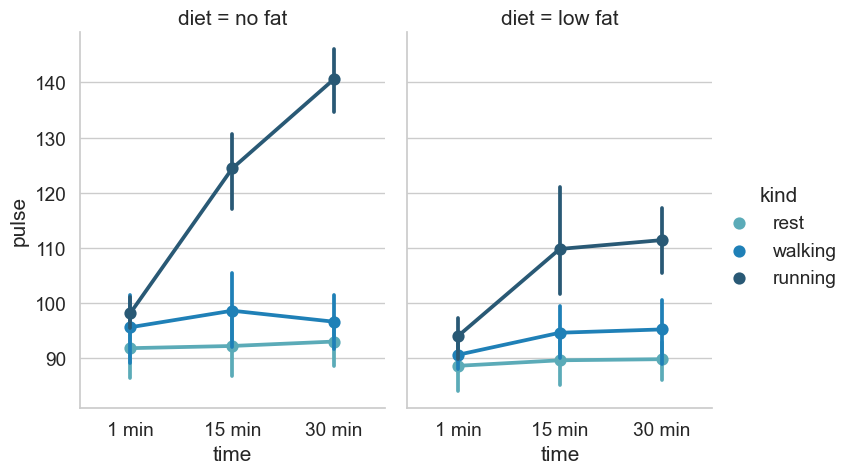

In [6]:
sns.set(style="whitegrid", font_scale=1.25)

sns.catplot(x="time", y="pulse", hue="kind", col="diet",
            data=df, kind="point",
            hue_order=["rest", "walking", "running"],
            palette="YlGnBu_d", aspect=.75)

plt.show()

## 8.3.6 Test de Friedman 

Es la prueba de rango para más de 2 grupos de datos emparejados. 

Ej: 10 pianistas profesionales tienen los ojos vendados y se les pide que juzguen la calidad de 3 pianos diferentes. 

Cada jugador califica cada piano en una escala de 1 a 10 (siendo 1 la calificación más baja posible y 10 la calificación más alta posible). 

La hipótesis nula es que los 3 pianos tienen la misma calificación. 

Para probar la hipótesis nula, se utiliza la prueba de Friedman sobre las calificaciones de los 10 pianistas. 

En los casos en que el ANOVA de medidas repetidas de una vía no es apropiado, la transformación de rango seguida de ANOVA proporcionará una prueba más robusta con mayor poder estadístico que la prueba de Friedman (Thom Baguley) (http:// www.r-bloggers.com/beware-the-friedman-test/).

# 8.4 Resumen: Selección de la prueba adecuada para comparar grupos

Cuando tenemos datos univariados y 2 grupos, podemos hacer la pregunta: "¿Son diferentes?"

La respuesta se obtiene mediante pruebas de hipótesis: 
- Mediante una prueba t 
    - Si los datos se distribuyen normalmente
- Mediante una prueba de Mann-Whitney
    - En caso contrario. 
    
¿Qué sucede cuando tenemos más de 2 grupos? 

Para responder a la pregunta "¿Son diferentes?" para más de 2 grupos, tenemos que empezar con comprobaciones de normalidad y con la prueba de Levene para comprobar la igualdad de las varianzas. 
- Si ese es el caso
    - Procedemos con ANOVA. 
- Si no se cumple esta condición
    - Se debe utilizar la prueba de Kruskal-Wallis. 
    
Si estas pruebas indican que se debe rechazar la hipótesis nula, entonces se deben usar pruebas post hoc para averiguar qué grupos son significativamente diferentes entre sí. 

¿Qué debemos hacer si tenemos datos emparejados? 

Si hemos emparejado pares para 2 grupos y las diferencias no se distribuyen normalmente, podemos usar la prueba de la suma de rangos con signo de Wilcoxon. 

La prueba de rango para más de dos grupos de datos emparejados es la prueba de Friedman.

|Grupos comparados|Muestras independientes|Muestras emparejadas|
|---|---|---|
|Datos nominales| | |
|2|Prueba exacta de Fisher o prueba de chi-cuadrado (para >2 grupos)|Test de McNemar|
|Datos ordinales| | |
|1|Prueba de suma de rangos con signo de Wilcoxon|-|
|2|Prueba U de Mann-Whitney|Prueba de suma de rango con signo de Wilcoxon|
|3 o más|Test de Kruskal-Wallis|Test de Friedman|
|Datos continuos| | |
|1|Prueba t de una muestra o prueba de suma de rangos con signo de Wilcoxon|-|
|2|Prueba t de Student o prueba de Mann-Whitney|Prueba t pareada o prueba de suma de rangos con signo de Wilcoxon|
|3 o más|Prueba ANOVA o Kruskal-Wallis|Medidas repetidas ANOVA o prueba de Friedman|

Ejemplos hipotéticos
- 2 grupos, nominal 
    - masculino/femenino, ojos rubios/ojos oscuros. 
    - ¿Las mujeres tienen ojos azules con más frecuencia que los hombres? 
 
- 2 grupos, nominales, emparejados 
    - 2 laboratorios, análisis de muestras de sangre. 
    - ¿El análisis de sangre de Lab1 indica más infecciones que el análisis de Lab2? 

- 1 grupo, ordinal
    - Secuencia de planetas gigantes. 
    - En nuestro sistema solar, ¿los planetas gigantes están más alejados que el promedio en la secuencia de planetas?

- 2 grupos, ordinal 
    - jamaicano/estadounidense, ranking 100 m sprint. 
    - ¿Son los velocistas jamaicanos más exitosos que los velocistas estadounidenses? 
    
- 2 grupos, ordinal, emparejados
    - Velocistas, dieta antes/después. 
    - ¿La dieta del chocolate hace que los velocistas sean más exitosos? 
    
- 3 o más grupos, ordinales 
    - solteros/casados/divorciados, ranking 100 m sprint. 
    - ¿El estado civil tiene un efecto en el éxito de los velocistas?
    
- 3 o más grupos, ordinales, emparejados
    - Velocistas de EEUU, China y Rusia, antes/después de la dieta. 
    - ¿Una dieta de arroz hace que los velocistas chinos sean más exitosos?
    
- 1 grupo, continuo
    - Ingesta calórica media. 
    - ¿Nuestros hijos comen más de lo que deberían?
    
- 2 grupos, continuo
    - masculino/femenino, IQ. 
    - ¿Son las mujeres más inteligentes que los hombres? 
    
- 2 grupos, continuos, emparejados 
    - Hombre, mirando autos deportivos. 
    - ¿Mirar autos deportivos aumenta el latido del corazón masculino más que el latido del corazón femenino? 
    
- 3 grupos, continuos 
    - Tiroleses, vieneses, estirios; coeficiente intelectual 
    - ¿Son los tiroleses más inteligentes que las personas de otros estados federales de Austria? 

- 3 grupos, continuos, emparejados
    - Tiroleses, vieneses, estirenos; mirando las montañas. 
    - ¿Mirar las montañas eleva más los latidos del corazón de los tiroleses que los de otras personas?

- ANOVA de 2 factores 
    - pequeño/grande y masculino/femenino. 
    - ¿Los hombres altos tienen un ingreso más alto?

# 8.5 Exercises

1. Uno o dos grupos 

a) Prueba t de una muestra para la media y Prueba de suma de rango con signo de Wilcoxon

La ingesta diaria de energía de 11 mujeres sanas es

[5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770] kJ. 

¿Es este valor significativamente diferente del valor recomendado de 7725?

b) Prueba t de muestras independientes 

En una clínica, 15 pacientes perezosos pesan [76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64, 76, 81, 86.] kg, y 15 pacientes deportistas pesan [64, 65, 56, 62, 59, 76, 66, 82, 91, 57, 92, 80, 82, 67, 54] kg. 

¿Son los pacientes perezosos significativamente más pesados? 

c) Prueba de normalidad 

¿Se distribuyen normalmente los dos conjuntos de datos? 

d) Prueba de Mann-Whitney 

¿Son los pacientes perezosos aún más pesados, si se comprueba con la prueba de Mann-Whitney?

$\textbf{a)}$

In [14]:
# Datos
data = np.array([5260, 5470, 5640, 6180, 6390,
                 6515, 6805, 7515, 7515, 8230, 8770],
                dtype=float)
data

array([5260., 5470., 5640., 6180., 6390., 6515., 6805., 7515., 7515.,
       8230., 8770.])

In [15]:
checkValue = 7725

In [16]:
alpha = 0.05

In [17]:
# (1) Prueba de normalidad
# No necesitamos el primer parámetro, así que simplemente asignamos la salida a la variable ficticia "_"
(_, p) = stats.normaltest(data)
if p < alpha:
    print('Los datos se distribuyen normalmente.')
else:
    print(f'Los datos se distribuyen normalmente, p = {p:.3f}')

Los datos se distribuyen normalmente, p = 0.681


In [18]:
# (2) Haga la prueba t de una muestra
t, prob = stats.ttest_1samp(data, checkValue)

In [19]:
t

-2.8207540608310193

In [20]:
prob

0.018137235176105812

In [21]:
if prob < alpha:
    print(f'Con la prueba t de una muestra, {checkValue} es significativamente diferente de la media (p = {prob:5.3f}).')
else:
    print('No hay diferencia con el valor de referencia con la prueba t de una muestra.')

Con la prueba t de una muestra, 7725 es significativamente diferente de la media (p = 0.018).


In [22]:
# (3) Esta implementación de la prueba de Wilcoxon verifica la "diferencia" de un vector de datos de cero
(_,p) = stats.wilcoxon(data-checkValue, correction=True)

In [23]:
p

0.0244140625

In [24]:
if p < alpha:
    print(f'Con la prueba de Wilcoxon, {checkValue:4.2f} es significativamente diferente de la media (p={p:5.3f}).')
else:
    print('Sin diferencia con el valor de referencia con la prueba de suma de rangos de Wilcoxon.')

Con la prueba de Wilcoxon, 7725.00 es significativamente diferente de la media (p=0.024).


$\textbf{b)}$

In [41]:
# Datos
data1 = [76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64, 76, 81, 86]
data2 = [64, 65, 56, 62, 59, 76, 66, 82, 91, 57, 92, 80, 82, 67, 54]

In [42]:
# Test t para muestras independientes
t, pval = stats.ttest_ind(data1, data2)    

In [43]:
t

2.0968730776547093

In [44]:
pval

0.04516066585880743

In [46]:
if pval < alpha:
    print(f'Perezosos y deportistas son significativamente diferentes (p = {pval:5.3f})')
else:
    print('No hay diferencia entre perezosos y deportistas con el test T.')

Perezosos y deportistas son significativamente diferentes (p = 0.045)


Los pacientes perezosos son significativamente más pesados.

$\textbf{c)}$

In [31]:
# Para hacer la prueba para ambos conjuntos de datos, haga una tupla con "(... , ...)", agregue un contador con "enumerar" e itere sobre el conjunto:
for i, data in enumerate((data1, data2)):
    (_, pval) = stats.normaltest(data)
    if pval > alpha:
            print(f'El conjunto de datos # {i} se distribuye normalmente.')
    else:
        print(f'El conjunto de datos # {i} no se distribuye normalmente.')

El conjunto de datos # 0 se distribuye normalmente.
El conjunto de datos # 1 se distribuye normalmente.


Ambos conjuntos de datos se distribuyen normalmente.

$\textbf{d)}$

In [47]:
# Test Mann-Whitney
u, pval = stats.mannwhitneyu(data1, data2, alternative='two-sided')

In [48]:
u

155.5

In [49]:
pval

0.07740194475805182

In [50]:
if pval < alpha:
    print(f'Perezosos y deportistas son significativamente diferentes (p = {pval:5.3f})')
else:
    print('No hay diferencia entre perezosos y deportistas.')

No hay diferencia entre perezosos y deportistas.


In [38]:
# Usando la prueba de una cola
u, pval = stats.mannwhitneyu(data1, data2, alternative='greater')

In [39]:
pval

0.03870097237902591

In [40]:
if pval < alpha:
    print(f'Los pacientes perezosos también son más pesados (p = {pval:5.3f}).')
else:
    print('No hay diferencia entre perezosos y deportistas.')

Los pacientes perezosos también son más pesados (p = 0.039).


2. Grupos Múltiples

El siguiente ejemplo está tomado del libro realmente bueno, pero algo avanzado, de AJ Dobson: “An Introduction to Generalized Linear Models”: 

a) Obtenga los datos 

El archivo Data/data_others/Table 6.6 Plant experiment.xls, que también se puede encontrar en https://github.com/thomas-haslwanter/statsintro-python-2e/tree/master/data, contiene datos de un experimento con plantas en tres condiciones de crecimiento diferentes. Lea los datos en Python. Sugerencia: utilice el módulo xlrd. 

b) Realizar un ANOVA 

¿Son diferentes los 3 grupos? 

c) Comparaciones Múltiples 

Utilizando la prueba de Tukey, ¿cuáles de los pares son diferentes? 

d) Kruskal–Wallis 

¿Llevaría una comparación no paramétrica a un resultado diferente?

$\textbf{a)}$

In [57]:
import xlrd
# Primero tenemos que obtener los datos de Excel en Python. Esto se puede hacer, p. con el paquete "xlrd".
book = xlrd.open_workbook(r'Datos/Table 6.6 Plant experiment.xls')
# Los datos están en la primera hoja.
sheet = book.sheet_by_index(0)
# Seleccione las columnas y filas que desee:
# La información del "tratamiento" se encuentra en la columna "E", es decir, debe omitir las primeras 4 columnas
# La información de "peso" está en la columna "F", es decir, debe omitir las primeras 5 columnas
treatment = sheet.col_values(4)
weight = sheet.col_values(5)
# Los datos comienzan en la línea 4, por lo que debe omitir los primeros 3
# Uso un DataFrame "pandas", para poder asignar nombres a las variables.
df = pd.DataFrame({'group':treatment[3:],
                   'weight':weight[3:]})

In [58]:
df.head()

,group,weight
0,Control,4.17
1,Control,5.58
2,Control,5.18
3,Control,6.11
4,Control,4.50


In [59]:
df.tail()

,group,weight
25,TreatmentB,5.29
26,TreatmentB,4.92
27,TreatmentB,6.15
28,TreatmentB,5.80
29,TreatmentB,5.26


$\textbf{b)}$

In [61]:
# Agrupar los datos
grouped = df.groupby('group')

In [62]:
# Extraer los valores en una lista
data = []
for group in (grouped.groups.keys()):
    print(group)
    data.append(grouped.get_group(group).weight)

Control
TreatmentA
TreatmentB


In [63]:
data

[0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64]

In [64]:
# Haga la prueba de Levene en esos valores
_, p = stats.levene(*data)

In [65]:
p

0.3412266241254737

In [66]:
if p > alpha:
    print('Las varianzas son iguales, puedes hacer un ANOVA.')
else:
    print('Las varianzas NO son iguales, debe proceder con una prueba de Kruskal-Wallis.')

Las varianzas son iguales, puedes hacer un ANOVA.


In [70]:
# Primero, ajusto un estadístico "mínimo cuadrado ordinario (MCO)" 
# -modelo a los datos, usando el lenguaje de fórmulas de "patsy".
# La fórmula  'weight ~ C(group)' dice:
# "weight" es una función del valor categórico "group"

model = smf.ols('weight ~ C(group)', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.846
Date:                Fri, 28 Jul 2023   Prob (F-statistic):             0.0159
Time:                        16:06:26   Log-Likelihood:                -26.810
No. Observations:                  30   AIC:                             59.62
Df Residuals:                      27   BIC:                             63.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [72]:
from statsmodels.stats.anova import anova_lm

In [73]:
# "anova_lm" (donde "lm" significa "modelo lineal")
# extrae los parámetros ANOVA del modelo ajustado.
anovaResults = anova_lm(model)
anovaResults

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,3.76634,1.883170,4.846088,0.01591
Residual,27.0,10.49209,0.388596,NaN,NaN


In [74]:
if anovaResults['PR(>F)'][0] < alpha:
    print('Uno de los grupos es diferente.')
else:
    print('Ninguno de los grupos es diferente.')

Uno de los grupos es diferente.


$\textbf{c)}$

In [75]:
from statsmodels.stats import multicomp

In [77]:
# Un ANOVA es una prueba de hipótesis y solo responde a la pregunta: "¿Son todos los grupos de la misma distribución?"
# ¡NO te dice cuál es diferente!
# Dado que ahora comparamos muchos grupos diferentes entre sí, 
# tenemos que ajustar los valores p para asegurarnos de que no obtengamos un error de Tipo I. 

mc = multicomp.MultiComparison(df['weight'],
                                   df['group'])

In [78]:
# There are many ways to do multiple comparisons. 
# Elegimos la prueba "Diferencia significativa honesta de Tukeys".
# El primer elemento de la salida ("0") es una tabla que contiene los resultados
print(mc.tukeyhsd().summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
   Control TreatmentA   -0.371 0.3909 -1.0622 0.3202  False
   Control TreatmentB    0.494  0.198 -0.1972 1.1852  False
TreatmentA TreatmentB    0.865  0.012  0.1738 1.5562   True
-----------------------------------------------------------


In [79]:
# Mostrar los nombres de los grupos
print(mc.groupsunique)

['Control' 'TreatmentA' 'TreatmentB']


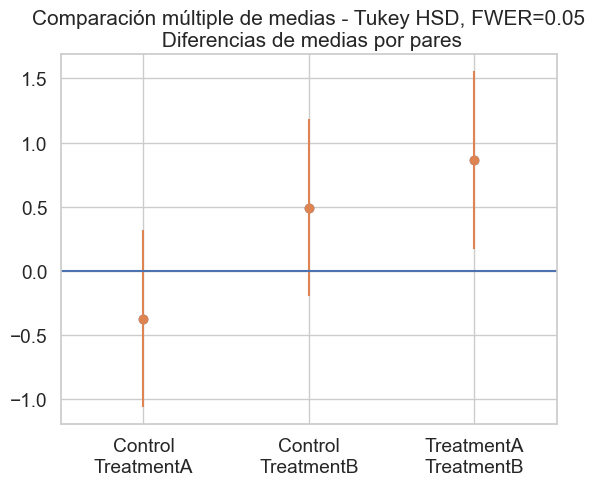

In [80]:
res2 = mc.tukeyhsd()     # Obtener los datos

simple = False
if simple:
    # Puedes hacer el gráfico con una sola línea, pero esto, todavía, no se ve tan bien.
    res2.plot_simultaneous()
else:
    # O puedes hacerlo de la manera difícil, es decir, a mano:
    # Grafico valores y barras de error
    xvals = np.arange(3)
    plt.plot(xvals, res2.meandiffs, 'o')
    errors = np.ravel(np.diff(res2.confint)/2)
    plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt='o')

    # Establecer los límites x
    xlim = -0.5, 2.5
    # El "*xlim" pasa los elementos de la variable
    # "xlim" por elementos en la función "hlines"
    plt.hlines(0, *xlim)
    plt.xlim(*xlim)

    # Graficar etiquetas:
    # Primero, "np.array(mc.groupsunique)" hace un vector
    # con los nombres de los grupos
    # "np.column_stack(res2[1][0])]"pone los grupos correctos juntos
    pair_labels = mc.groupsunique[np.column_stack(res2._multicomp.pairindices)]
    labels = ['\n'.join(label) for label in pair_labels]
    plt.xticks(xvals, labels)

    plt.title('Comparación múltiple de medias - Tukey HSD, FWER=0.05\n Diferencias de medias por pares')

    plt.show()

$\textbf{d)}$

In [81]:
# Primero, obtengo los valores del marco de datos
g_a = df['weight'][df['group']=='TreatmentA']
g_b = df['weight'][df['group']=='TreatmentB']
g_c = df['weight'][df['group']=='Control']

In [82]:
#Nota: esto también podría lograrse con la función "groupby" de pandas
# groups = pd.groupby(data, 'group')
# g_a = groups.get_group('TreatmentA').values[:,1]
# g_c = groups.get_group('Control').values[:,1]
# g_b = groups.get_group('TreatmentB').values[:,1]

In [83]:
# Testnn de Kruskal-Wallis
h, p = stats.kruskal(g_c, g_a, g_b)

In [84]:
h

7.988228749443715

In [85]:
p

0.018423755731471966

In [88]:
if p < alpha:
    print(f'Uno de los grupos es diferente (p = {p:5.3f}).')
else:
    print('Ninguno de los grupos es diferente.')

Uno de los grupos es diferente (p = 0.018).


# Apéndice 

## 1. Tests de hipótesis vs modelado

In [3]:
# Generar datos distribuidos normalmente alrededor de 'referencia'

np.random.seed(123)

reference = 5

data = reference + np.random.randn(100)

In [4]:
# Test t

(t, pVal) = stats.ttest_1samp(data, reference)

print(f'La probabilidad de que la media muestral sea diferente de {reference} es {pVal:5.3f}.')

La probabilidad de que la media muestral sea diferente de 5 es 0.812.


In [6]:
# Modelo Lineal

df = pd.DataFrame({'data': data-reference})

result = smf.ols(formula='data ~ 1', data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 11 Aug 2023   Prob (F-statistic):                nan
Time:                        23:58:17   Log-Likelihood:                -153.96
No. Observations:                 100   AIC:                             309.9
Df Residuals:                      99   BIC:                             312.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0271      0.113      0.239      0.8